In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import dataset
spam_df = pd.read_csv('emails.csv')
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [3]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [4]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


In [20]:
#visualize data
legit = spam_df[spam_df['spam']==0]
legit

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [7]:
spam = spam_df[spam_df['spam']==1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [9]:
#plot percentage between spam and not spam
print('Percentage of spam emails: ', (len(spam)/len(spam_df))*100, '%')

Percentage of spam emails:  23.88268156424581 %


In [21]:
print('Percentage of legit emails: ', (len(legit)/len(spam_df))*100, '%')

Percentage of legit emails:  76.11731843575419 %


In [14]:
#count vectorizer example
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document', 'This document is the second document', 'And this is the third one', 'Is this the first document?']
vectorizer = CountVectorizer()


In [17]:
x = vectorizer.fit_transform(sample_data)
x

<4x9 sparse matrix of type '<class 'numpy.int64'>'
	with 21 stored elements in Compressed Sparse Row format>

In [18]:
x.toarray()

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]])

In [19]:
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [22]:
#apply count vectorizer to spam/legit example
vectorizer = CountVectorizer()
spam_legit_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [28]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzn', 'zzncacst', 'zzzz'], dtype=object)

In [29]:
spam_legit_countvectorizer.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [4, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [30]:
spam_legit_countvectorizer.shape

(5728, 37303)

In [32]:
label = spam_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0])

In [33]:
#train the model using entire dataset 
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spam_legit_countvectorizer, label)

MultinomialNB()

In [39]:
#test model
test_sample = ['Get Rich Quick!', 'You Won the Lottery!', 'Act Now and Make Millions!', 
               'Your Requested Information is Attached', 'Your Invitation to Join Our Program', 'Thank You for Your Purchase']
test_sample_countvectorizer = vectorizer.transform(test_sample)

In [40]:
test_pred = NB_classifier.predict(test_sample_countvectorizer)
test_pred

array([1, 1, 1, 0, 0, 0])

In [42]:
x = spam_legit_countvectorizer
y = label

In [43]:
x.shape

(5728, 37303)

In [44]:
y.shape

(5728,)

In [45]:
#split data to train and test before training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [47]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(x_train, y_train)

MultinomialNB()

In [48]:
#model evaluation
from sklearn.metrics import classification_report, confusion_matrix

y_pred_train = NB_classifier.predict(x_train)
y_pred_train

array([1, 0, 0, ..., 0, 0, 0])

<AxesSubplot: >

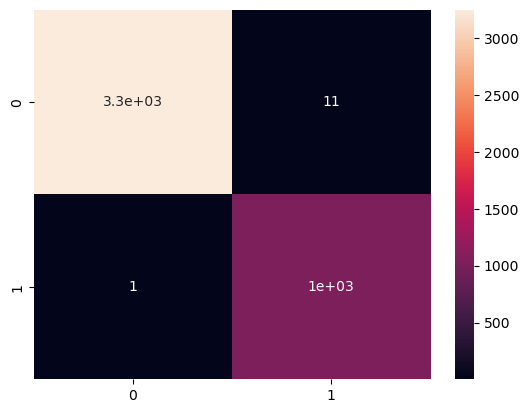

In [51]:
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True)

In [52]:
y_pred_test = NB_classifier.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 1, 0])

<AxesSubplot: >

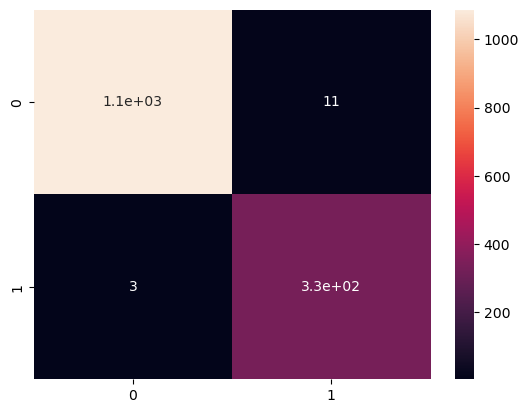

In [53]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True)

In [54]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1098
           1       0.97      0.99      0.98       334

    accuracy                           0.99      1432
   macro avg       0.98      0.99      0.99      1432
weighted avg       0.99      0.99      0.99      1432

